# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [ ]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 124kB/s 
     |████████████████████████████████| 450kB 58.1MB/s 
     |████████████████████████████████| 3.8MB 50.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1b18ca8ee952e2d18a919c7be52cebf737e0539030e6cf240c3990675e1b7f89
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
#Set your project path 
project_path =  "/content/drive/My Drive/NLP/Project/Dataset/Sarcasm Detection/Data/"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [3]:
import pandas as pd

data = pd.read_json(path_or_buf = '/content/drive/My Drive/NLP/Project/Dataset/Sarcasm Detection/Data/Sarcasm_Headlines_Dataset.json', lines = True)

In [4]:
data.shape

(26709, 3)

In [5]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
# Let's look at one of the review so that we get an idea of text that we will be processing
data["headline"][3]

'boehner just wants wife to listen, not come up with alternative debt-reduction ideas'

We can see our text contains punctuations

In [7]:
# Remove punctuation & capital letters (if any) from reviews
import re

data['headline'] = data['headline'].apply(lambda x: x.lower())
data['headline'] = data['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
data["headline"][3]

'boehner just wants wife to listen not come up with alternative debtreduction ideas'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


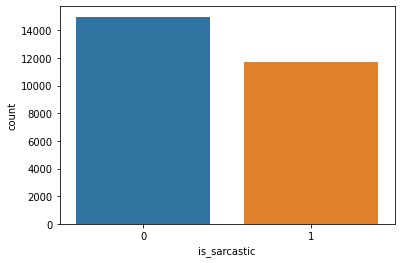

In [8]:
import seaborn as sns

sns.countplot(x='is_sarcastic', data= data)

We can see above that no of sarcastic comment is slightly lesser than non-sarcastic ones

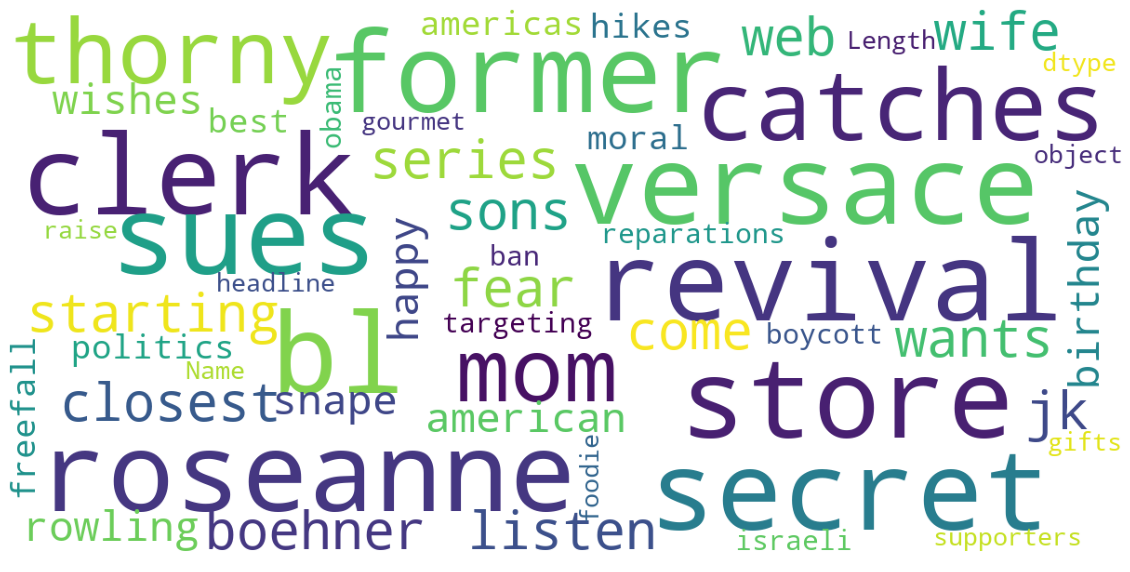

In [9]:
# Get the word cloud to visually understand frequently used words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["headline"])

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [10]:
data = data[['headline','is_sarcastic']]
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [11]:
# Adding a column for counting words of each headline
data['words_count'] = data['headline'].apply(lambda x:len(x.split(" ")))
data.head()

,headline,is_sarcastic,words_count
0,former versace store clerk sues over secret bl...,0,12
1,the roseanne revival catches up to our thorny ...,0,14
2,mom starting to fear sons web series closest t...,1,14
3,boehner just wants wife to listen not come up ...,1,13
4,jk rowling wishes snape happy birthday in the ...,0,11


In [12]:
# Finding the line with maximum length of words
max_index = data[['words_count']].idxmax()
maxlen = data[['words_count']].max()

data.iloc[max_index]

,headline,is_sarcastic,words_count
15247,elmore leonard modern prose master noted for h...,1,39


In [13]:
maxlen

words_count    39
dtype: int64

#**## Modelling**

## Import required modules required for modelling.

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [15]:
max_features = 10000
maxlen = 39
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [16]:
tokenizer = Tokenizer(num_words= max_features)

tokenizer.fit_on_texts(data['headline'].values)

# Define X and y for your model.

In [17]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  293  795 3551 2241   47  359   92 2138    5 2509 8285]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [18]:
word_index = tokenizer.word_index
num_words = len(word_index) + 1
num_words

28399

#**## Word Embedding**

## Get Glove Word Embeddings

In [19]:
glove_file = project_path + "glove.6B.zip"

In [20]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [21]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# Create a weight matrix for words in training docs

In [22]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [23]:
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences= True)))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5679800   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           257       
Total params: 6,016,953
Trainable params: 6,016,953
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [25]:
batch_size = 100
epochs = 5

history = model.fit(X, y, batch_size = batch_size, epochs = epochs, verbose= 1, validation_split= 0.2)

Epoch 1/5
214/214 [==============================] - 14s 64ms/step - loss: 0.1532 - acc: 0.9420 - val_loss: 0.3390 - val_acc: 0.8696
Epoch 2/5
214/214 [==============================] - 14s 65ms/step - loss: 0.1256 - acc: 0.9531 - val_loss: 0.3857 - val_acc: 0.8676
Epoch 3/5
214/214 [==============================] - 14s 65ms/step - loss: 0.1043 - acc: 0.9621 - val_loss: 0.4298 - val_acc: 0.8663
Epoch 4/5
214/214 [==============================] - 14s 65ms/step - loss: 0.0854 - acc: 0.9693 - val_loss: 0.4911 - val_acc: 0.8638
Epoch 5/5
214/214 [==============================] - 14s 67ms/step - loss: 0.0674 - acc: 0.9763 - val_loss: 0.4854 - val_acc: 0.8673


Training Accuracy: 97.63%
Validation Accuracy: 86.73%
